<a href="https://colab.research.google.com/github/gah508/EPOCH_Beginner/blob/main/Final/jiyun_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🌱 EPOCH 비기너 세션 Final Test 🔥**





---



## **1️⃣ 'Sleep_health_and_lifestyle_dataset.csv' 파일을 불러와 수면 데이터를 분석하세요.**

### (0) 데이터를 불러오세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# 데이터 불러와, '데이터명'에 할당하기
sleep = pd.read_csv('/content/drive/MyDrive/EPOCH/Beginner Session/Sleep_health_and_lifestyle_dataset.csv')


# 할당한 데이터를 DataFrame으로 설정
sleep = pd.DataFrame(sleep)

# 데이터 확인
print(sleep)

Mounted at /content/drive
     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overw

### (1) 성별에 따른 평균 수면 시간('Sleep Duration')을 출력하세요.

In [ ]:
sleep.groupby('Gender')['Sleep Duration'].mean()

,Sleep Duration
Gender,
Female,7.229730
Male,7.036508


### (2) 스트레스 수준('Stress Level')이 3 이상인 사람들의 수면 질('Quality of Sleep') 평균을 구하세요.

In [ ]:
sleep.query('`Stress Level` >= 3')['Quality of Sleep'].mean()

7.31283422459893

### (3) 아래와 같은 수면 데이터에 대한 네 가지 그래프를 그리세요.
* colors = ['gold', 'gray','darkgray', 'silver', 'lightgray', 'whitesmoke'] & 'coral' & 'purple' & 'green'

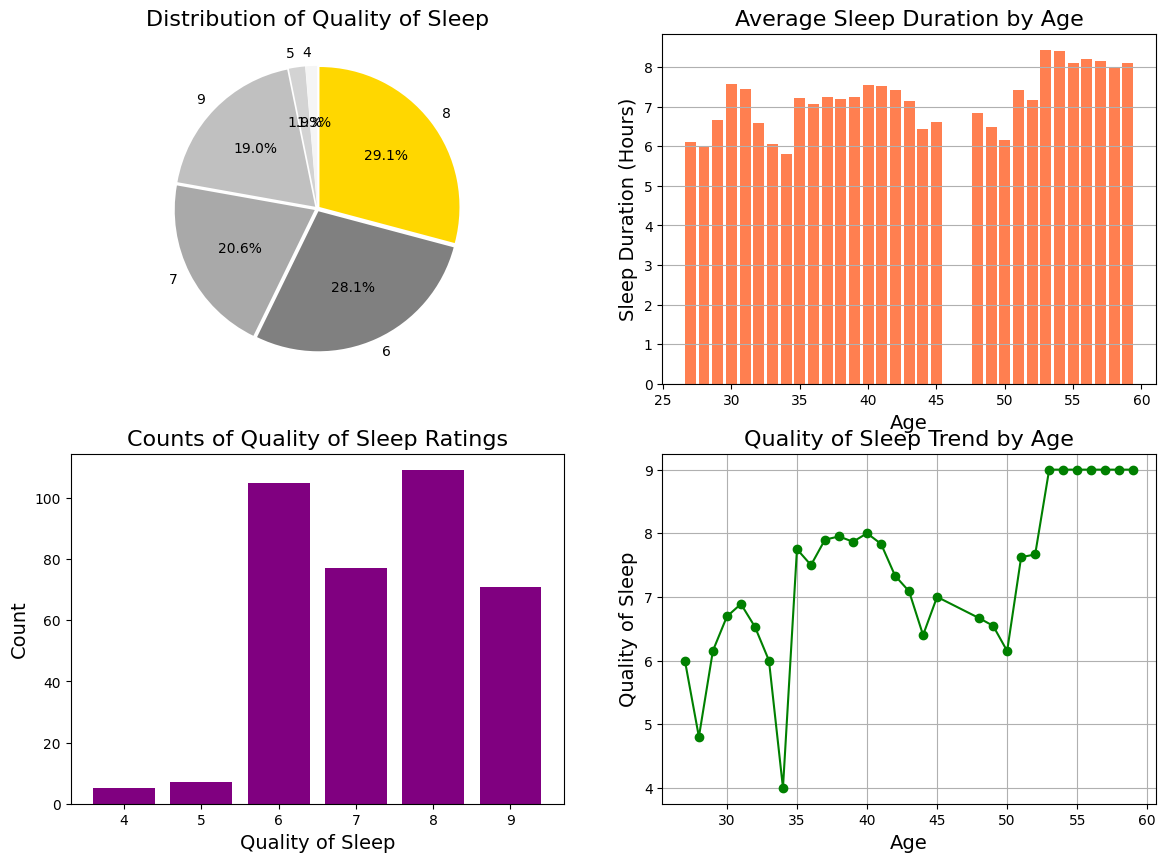

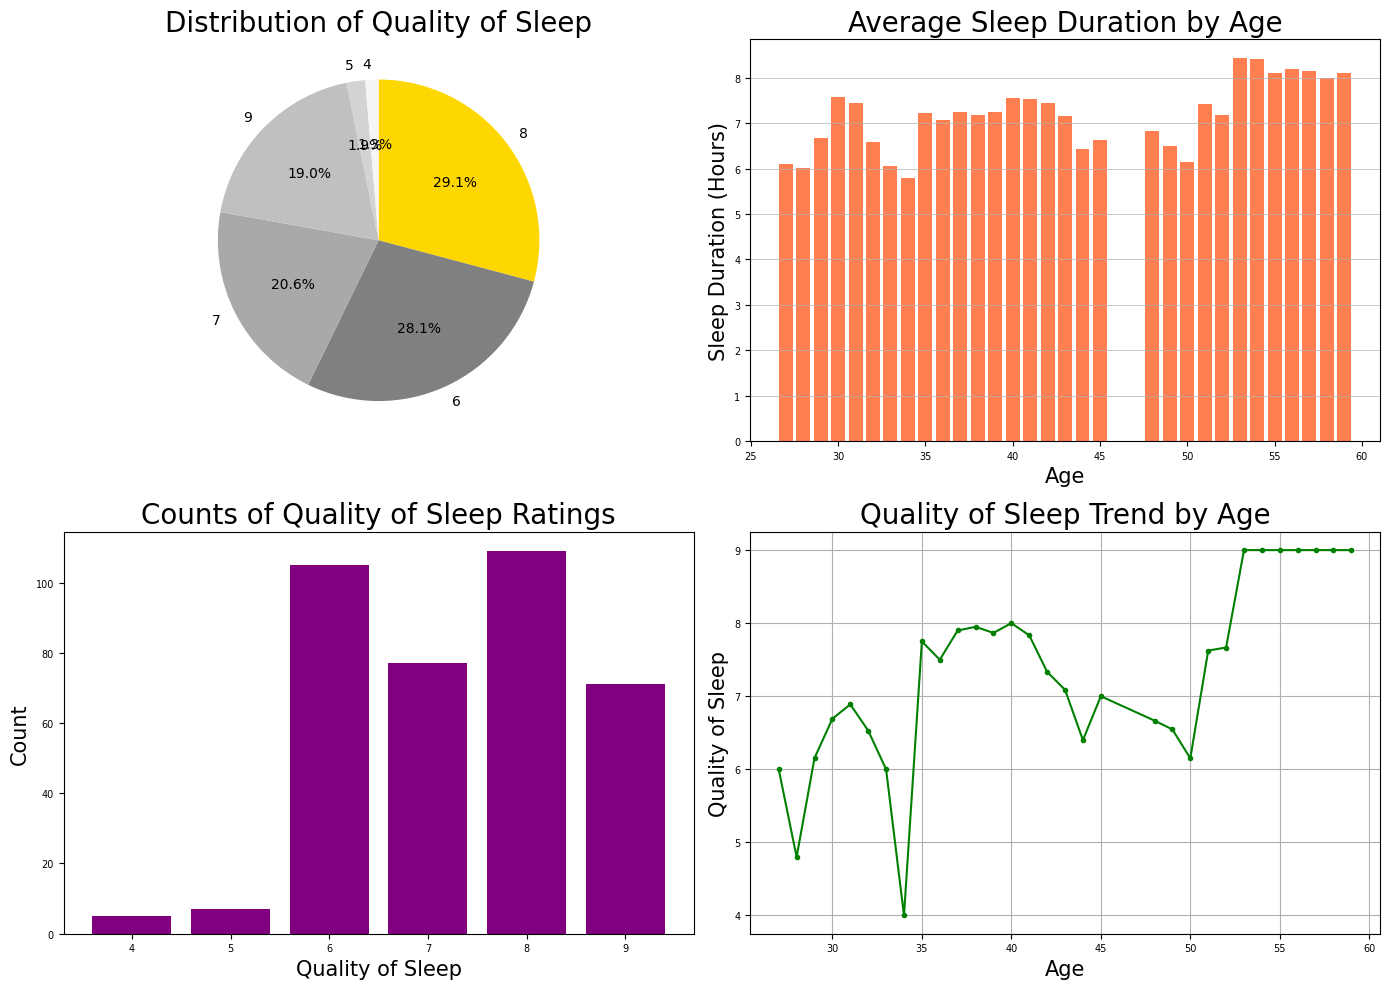

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2,2, figsize=(14,10))
quality_sum = sleep.groupby('Quality of Sleep')['Quality of Sleep'].count()
quality_total = sleep['Quality of Sleep'].count()
quality_sum_sort = quality_sum.sort_values(ascending=False)
quality = quality_sum_sort.index

colors = ['gold', 'gray','darkgray', 'silver', 'lightgray', 'whitesmoke']
ratio = quality_sum_sort/quality_total

plt.subplot(221)
plt.pie(ratio, autopct='%.1f%%',startangle=90, labels=quality, colors=colors, counterclock=False, textprops={'size':10})
plt.title('Distribution of Quality of Sleep', size=20)

avg_sleep = sleep.groupby('Age')['Sleep Duration'].mean()
age = np.array(sleep['Age'].unique())

plt.subplot(222)
plt.bar(age, avg_sleep, color='coral')
plt.grid(axis = 'y', linewidth=0.5)
plt.xlabel('Age', size=15)
plt.ylabel('Sleep Duration (Hours)', size=15)
plt.title('Average Sleep Duration by Age', size=20)
plt.xticks(np.arange(25,65,5), size=7)
plt.yticks(np.arange(0,9), size=7)


plt.subplot(223)
plt.bar(quality_sum.index, quality_sum, color='purple')
plt.title('Counts of Quality of Sleep Ratings', size=20)
plt.xlabel('Quality of Sleep', size=15)
plt.ylabel('Count', size=15)
plt.xticks(np.arange(4,10), size=7)
plt.yticks(np.arange(0,120,20), size=7)

quality_age = sleep.groupby(['Age'])['Quality of Sleep'].mean()
plt.subplot(224)
plt.plot(age, quality_age, color='green', marker='o', markersize=3)
plt.title('Quality of Sleep Trend by Age', size=20)
plt.xlabel('Age', size=15)
plt.ylabel('Quality of Sleep', size=15)
plt.xticks(np.arange(30,65,5), size=7)
plt.yticks(np.arange(4,10), size=7)
plt.grid()

plt.tight_layout()
plt.show()

## **2️⃣‘calendar.csv' 파일과 'listings.csv' 파일을 불러와 Airbnb 예약 데이터를 분석하세요.**

### (0) 데이터를 불러오세요.

In [ ]:

calender = pd.read_csv('/content/drive/MyDrive/EPOCH/Beginner Session/calendar.csv')
listings = pd.read_csv('/content/drive/MyDrive/EPOCH/Beginner Session/listings.csv')


# 할당한 데이터를 DataFrame으로 설정
cal = pd.DataFrame(calender)
list = pd.DataFrame(listings)
print(cal)
print(list)

         listing_id        date available   price  adjusted_price  \
0              6606  2024-06-24         f  $90.00             NaN   
1              6606  2024-06-25         f  $90.00             NaN   
2              6606  2024-06-26         f  $90.00             NaN   
3              6606  2024-06-27         f  $90.00             NaN   
4              6606  2024-06-28         f  $90.00             NaN   
...             ...         ...       ...     ...             ...   
2350873      708774  2025-06-19         t  $85.00             NaN   
2350874      708774  2025-06-20         t  $85.00             NaN   
2350875      708774  2025-06-21         t  $85.00             NaN   
2350876      708774  2025-06-22         t  $85.00             NaN   
2350877      708774  2025-06-23         t  $85.00             NaN   

         minimum_nights  maximum_nights  
0                  30.0          1125.0  
1                  30.0          1125.0  
2                  30.0          1125.0  
3  

### (1) 두 데이터셋을 'listing_id'를 기준으로 병합하여 숙소가 예약이 가능한 상태인 날짜의 수를 세어 숙소별로 출력하세요.
* Hint: 'availability_365'가 0보다 크면 예약 가능한 상태

In [ ]:
df = pd.merge(cal, list, on='listing_id')
df_avail = df[df['availability_365'] > 0]
df_avail_count = df_avail.groupby('listing_id')['available'].count()
print(df_avail_count)

listing_id
6606        365
9419        365
9531        365
9534        365
9596        365
           ... 
54385010    365
54396923    365
54396956    365
54397152    365
54397466    365
Name: available, Length: 2860, dtype: int64
